In [110]:
# from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2 ##STrAdaBoost.R2
# from TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2 ##two-stage TrAdaBoost.R2

import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #Importing the StandardScaler

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt

#Geo plotting libraries
import geopandas as gdp
from matplotlib.colors import ListedColormap
# import geoplot as glpt

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
import matplotlib.lines as mlines

import statistics

from scipy.stats import rv_continuous
from scipy.stats import *

from statistics import mean
from sklearn.cluster import KMeans
from scipy.spatial import distance


######### Instance Transfer repositories ####################
from adapt.instance_based import TwoStageTrAdaBoostR2

print("Repositories uploaded!!")

Repositories uploaded!!


In [111]:
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2
from sklearn.model_selection import GridSearchCV
from adapt.instance_based import KMM

print("Second Upload Completed!!")

Second Upload Completed!!


In [112]:
####### Importing libraries for map plots #######

import geopandas as gpd
import json
import altair as alt
import pandas as pd

from os import listdir
from os.path import isfile, join
import glob

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns

In [113]:
### Reading the US 2018 dataset
US_new_source = pd.read_csv('US_data/new_US_dataset/source_test.csv')
US_new_target = pd.read_csv('US_data/new_US_dataset/target_test.csv')

In [114]:
US_new_target.shape, US_new_source.shape 
US_new_target.columns

Index(['ID', 'Date', 'PM25', 'Region', 'CF_CLDTT', 'CF_PS', 'CF_Q', 'CF_Q10M',
       'CF_Q2M', 'CF_RH', 'CF_SLP', 'CF_T', 'CF_T10M', 'CF_T2M', 'CF_TPREC',
       'CF_TROPPB', 'CF_TS', 'CF_U', 'CF_U10M', 'CF_U2M', 'CF_V', 'CF_V10M',
       'CF_V2M', 'CF_ZL', 'CF_ZPBL', 'CF_PM25', 'CF_CO', 'CF_NO2', 'CF_O3',
       'CF_SO2', 'LC_Shrubs', 'LC_Herbaceous', 'LC_Agriculture', 'LC_Urban',
       'LC_Bare', 'LC_Snow', 'LC_Water', 'LC_Wetland', 'LC_Lichen',
       'LC_Closed_Forest', 'LC_Open_Forest', 'LC_Ocean', 'Elevation',
       'Dist_Primary', 'Dist_Secondary', 'Pop', 'Lon', 'Lat'],
      dtype='object')

In [115]:
######## Split into features and output ########
output_US = ['PM25']

US_y_source_df = US_new_source['PM25']
US_X_source_df = US_new_source.drop(output_US, axis = 1)

US_y_target_df = US_new_target['PM25']
US_X_target_df = US_new_target.drop(output_US, axis = 1)


######## Drop the unwanted features ########
drop_features = ['ID', 'Date', 'Region', 'Lon', 'Lat']

US_X_source_df = US_X_source_df.drop(drop_features, axis = 1)
US_X_target_df = US_X_target_df.drop(drop_features, axis = 1)

US_X_source_df.shape, US_X_target_df.shape
US_X_source_df.columns

Index(['CF_CLDTT', 'CF_PS', 'CF_Q', 'CF_Q10M', 'CF_Q2M', 'CF_RH', 'CF_SLP',
       'CF_T', 'CF_T10M', 'CF_T2M', 'CF_TPREC', 'CF_TROPPB', 'CF_TS', 'CF_U',
       'CF_U10M', 'CF_U2M', 'CF_V', 'CF_V10M', 'CF_V2M', 'CF_ZL', 'CF_ZPBL',
       'CF_PM25', 'CF_CO', 'CF_NO2', 'CF_O3', 'CF_SO2', 'LC_Shrubs',
       'LC_Herbaceous', 'LC_Agriculture', 'LC_Urban', 'LC_Bare', 'LC_Snow',
       'LC_Water', 'LC_Wetland', 'LC_Lichen', 'LC_Closed_Forest',
       'LC_Open_Forest', 'LC_Ocean', 'Elevation', 'Dist_Primary',
       'Dist_Secondary', 'Pop'],
      dtype='object')

In [116]:
######## Normalize the dataset ########
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_target = US_X_target_df.values 
X_target_scaled = min_max_scaler.fit_transform(X_target)
US_X_target_df = pd.DataFrame(X_target_scaled)

X_source = US_X_source_df.values 
X_source_scaled = min_max_scaler.fit_transform(X_source)
US_X_source_df = pd.DataFrame(X_source_scaled)

In [117]:
US_X_target_df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,8.272812e-01,0.946823,0.103185,0.098439,0.096783,0.075007,0.723671,0.617497,0.607640,0.595801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.296381,0.292476,0.286463
1,5.206282e-01,0.946948,0.271847,0.262674,0.256929,0.198366,0.725258,0.626451,0.619452,0.611232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.296381,0.292476,0.286463
2,6.077174e-01,0.893265,0.441761,0.436748,0.427883,0.444067,0.434259,0.540808,0.536332,0.527199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.296381,0.292476,0.286463
3,0.000000e+00,0.961028,0.376618,0.372304,0.364236,0.369088,0.802700,0.569805,0.566485,0.562533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.296381,0.292476,0.286463
4,9.521268e-01,0.955045,0.194071,0.190295,0.187262,0.182382,0.770261,0.570736,0.563269,0.553933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.296381,0.292476,0.286463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,3.241445e-08,0.227873,0.449790,0.458414,0.463797,0.295111,0.544184,0.623240,0.630562,0.637230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.907152,0.103218,0.093607,0.000554
10216,0.000000e+00,0.221229,0.184650,0.188425,0.193010,0.241111,0.581110,0.430094,0.442945,0.457304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.907152,0.103218,0.093607,0.000554
10217,0.000000e+00,0.234674,0.249304,0.255928,0.262718,0.201952,0.616677,0.558672,0.567174,0.576144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.907152,0.103218,0.093607,0.000554
10218,2.769444e-02,0.199898,0.293804,0.296983,0.299266,0.319077,0.485674,0.471915,0.484383,0.495415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.907152,0.103218,0.093607,0.000554


In [118]:
######## Split into Train-Test ########

from sklearn.model_selection import train_test_split

US_X_target_df, US_X_test_df, US_y_target_df, US_y_test_df = train_test_split(US_X_target_df, US_y_target_df, test_size = 0.30)

######## Merging the datasets ########
US_X_df = pd.concat([US_X_target_df, US_X_source_df], ignore_index=True)
US_y_df = pd.concat([US_y_target_df, US_y_source_df], ignore_index=True)

US_np_train_X = US_X_df.to_numpy()
US_np_train_y = US_y_df.to_numpy()

US_np_test_X = US_X_test_df.to_numpy()
US_np_test_y = US_y_test_df.to_numpy()

US_np_train_y_list = US_np_train_y.ravel()
US_np_test_y_list = US_np_test_y.ravel()

src_size_US = len(US_y_source_df)
tgt_size_US = len(US_y_target_df)

print("---------------------------")

---------------------------


In [39]:
####################### Elastic Net Regression #########################################################

from sklearn.linear_model import ElasticNet

print("Elastic Net Regression Transfer Learning")
print("-------------------------------------------")

r2scorelist_ENTL_us = []
rmselist_ENTL_us = []

for x in range(0, 10):

    model_ENTL_us = ElasticNet(normalize = True, alpha = 0.01, l1_ratio = 0.75)
    model_ENTL_us.fit(US_np_train_X, US_np_train_y_list)


    y_pred_ENTL_us = model_ENTL_us.predict(US_np_test_X) 

    rmse_ENTL_us = sqrt(mean_squared_error(US_np_test_y_list, y_pred_ENTL_us))
    rmselist_ENTL_us.append(rmse_ENTL_us)
    
    r2_score_ENTL_us = pearsonr(US_np_test_y_list, y_pred_ENTL_us)
    r2_score_ENTL_us = (r2_score_ENTL_us[0])**2
    r2scorelist_ENTL_us.append(r2_score_ENTL_us)
    
print("Mean RMSE of Elastic N:", statistics.mean(rmselist_ENTL_us))
print("Mean R-squared of Elastic N:", statistics.mean(r2scorelist_ENTL_us))
print("\n")
print("RMSE of Elastic N:", rmselist_ENTL_us)
print("R-squared of Elastic N:", r2scorelist_ENTL_us)

print("-------------------------------------------")

Elastic Net Regression Transfer Learning
-------------------------------------------
Mean RMSE of Elastic N: 11.459042742133393
Mean R-squared of Elastic N: 0.5263031480122707


RMSE of Elastic N: [11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393]
R-squared of Elastic N: [0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707]
-------------------------------------------


In [28]:
####################### GBR Transfer Learning #########################################################
print("Gradient Boosting Regression Transfer Learning")
print("-------------------------------------------")

r2scorelist_GBRTL_us = []
rmselist_GBRTL_us = []

for x in range(0, 10):

    model_GBRTL_us = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample=0.5)
    model_GBRTL_us.fit(US_np_train_X, US_np_train_y_list)


    y_pred_GBRTL_us = model_GBRTL_us.predict(US_np_test_X) 

    rmse_GBRTL_us = sqrt(mean_squared_error(US_np_test_y_list, y_pred_GBRTL_us))
    rmselist_GBRTL_us.append(rmse_GBRTL_us)
    
    r2_score_GBRTL_us = pearsonr(US_np_test_y_list, y_pred_GBRTL_us)
    r2_score_GBRTL_us = (r2_score_GBRTL_us[0])**2
    r2scorelist_GBRTL_us.append(r2_score_GBRTL_us)
    
print("Mean RMSE of GBR:", statistics.mean(rmselist_GBRTL_us))
print("Mean R-squared of GBR:", statistics.mean(r2scorelist_GBRTL_us))
print("\n")
print("RMSE of GBR:", rmselist_GBRTL_us)
print("R^2 of GBR:", r2scorelist_GBRTL_us)

print("-------------------------------------------")

Gradient Boosting Regression
-------------------------------------------
Mean RMSE of GBR: 6.1237041643921994
Mean R-squared of GBR: 0.691797141193723


RMSE of GBR: [6.242791736154706, 5.967406971288434, 6.103326661391169, 6.07966037305247, 6.4169278145635475, 6.0571821464155065, 5.9666186528394425, 5.980383869431792, 6.331659419282624, 6.0910839995023]
R^2 of GBR: [0.6803614576376373, 0.7066887760393229, 0.69999203769556, 0.6945941560052241, 0.659883312133618, 0.6985052523902867, 0.7057963218332743, 0.7047052579294206, 0.6746246477627736, 0.6928201925101125]
-------------------------------------------


In [120]:
########################### AdaBoost.R2 Transfer Learning #####################################################

from sklearn.ensemble import AdaBoostRegressor


print("Adaboost.R2 Transfer Learning")
print("-------------------------------------------")

r2scorelist_AdaTL_US = []
rmselist_AdaTL_US = []


for x in range(0, 10):

    model_AdaTL_US = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), learning_rate = 0.01, n_estimators = 500) 
    model_AdaTL_US.fit(US_np_train_X, US_np_train_y_list)
    
    y_pred_AdaTL_US = model_AdaTL_US.predict(US_np_test_X) 
    
    rmse_AdaTL_US = sqrt(mean_squared_error(US_np_test_y_list, y_pred_AdaTL_US))
    rmselist_AdaTL_US.append(rmse_AdaTL_US)
        
    r2_score_AdaTL_US = pearsonr(US_np_test_y_list, y_pred_AdaTL_US)
    r2_score_AdaTL_US = (r2_score_AdaTL_US[0])**2
    r2scorelist_AdaTL_US.append(r2_score_AdaTL_US)
    

print("Mean RMSE of Adaboost.R2:", statistics.mean(rmselist_AdaTL_US))
print("Mean R-squared of AdaboostR2:", statistics.mean(r2scorelist_AdaTL_US))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_AdaTL_US)
print("R^2 of AdaboostR2:", r2scorelist_AdaTL_US)


print("-------------------------------------------")

Adaboost.R2 Transfer Learning
-------------------------------------------
Mean RMSE of Adaboost.R2: 8.243143411630145
Mean R-squared of AdaboostR2: 0.39924065062108927


RMSE of Adaboost.R2: [8.232257146636876, 8.25346584333486, 8.21037591599147, 8.278125021853175, 8.272184512267058, 8.263867952900434, 8.22618438442368, 8.196550708025356, 8.257250780880515, 8.241171849988028]
R^2 of AdaboostR2: [0.4001945712140022, 0.3977397596397475, 0.40406787813022266, 0.39390530366111676, 0.394781601034896, 0.3955751039758742, 0.4028969521057108, 0.4060709892725128, 0.3975578204080337, 0.3996165267687761]
-------------------------------------------


In [47]:
####################### XGBoost Transfer Learning #########################################################
from xgboost import XGBRegressor


print("XGB.R2 Transfer Learning")
print("-------------------------------------------")

r2scorelist_XGBTL_US = []
rmselist_XGBTL_US = []

# DecisionTreeRegressor(max_depth = 6), learning_rate=0.1, n_estimators = 100

for x in range(0, 10):

    model_XGBTL_US = XGBRegressor(n_estimators = 100, max_depth = 6, eta = 0.1, subsample = 0.5, colsample_bytree = 0.8, n_jobs = 8)
    model_XGBTL_US.fit(US_np_train_X, US_np_train_y_list)
    
    y_pred_XGBTL_US = model_XGBTL_US.predict(US_np_test_X) 
    
    rmse_XGBTL_US = sqrt(mean_squared_error(US_np_test_y_list, y_pred_XGBTL_US))
    rmselist_XGBTL_US.append(rmse_XGBTL_US)
        
    r2_score_XGBTL_US = pearsonr(US_np_test_y_list, y_pred_XGBTL_US)
    r2_score_XGBTL_US = (r2_score_XGBTL_US[0])**2
    r2scorelist_XGBTL_US.append(r2_score_XGBTL_US)
    

print("Mean RMSE of XGB.R2:", statistics.mean(rmselist_XGBTL_US))
print("Mean R-squared of XGB.R2:", statistics.mean(r2scorelist_XGBTL_US))
print("\n")
print("RMSE of XGB.R2:", rmselist_XGBTL_US)
print("R^2 of XGB.R2:", r2scorelist_XGBTL_US)


print("-------------------------------------------")

XGB.R2 Transfer Learning
-------------------------------------------
Mean RMSE of XGB.R2: 5.824769191814529
Mean R-squared of XGB.R2: 0.7341415650936336


RMSE of XGB.R2: [5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529]
R^2 of XGB.R2: [0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336]
-------------------------------------------


In [45]:
####################### XGBoost Random Forest Regression Transfer Learning #########################################################
from xgboost import XGBRFRegressor

print("XGBRF.R2 Transfer Learning")
print("-------------------------------------------")

r2scorelist_XGBRFTL_US = []
rmselist_XGBRFTL_US = []

# DecisionTreeRegressor(max_depth = 6), learning_rate=0.1, n_estimators = 100

for x in range(0, 10):

    model_XGBRFTL_US = XGBRFRegressor(n_estimators = 100, max_depth = 6, eta = 0.1, subsample = 0.5, colsample_bytree = 0.8)
    model_XGBRFTL_US.fit(US_np_train_X, US_np_train_y_list)
    
    y_pred_XGBRFTL_US = model_XGBRFTL_US.predict(US_np_test_X) 
    
    rmse_XGBRFTL_US = sqrt(mean_squared_error(US_np_test_y_list, y_pred_XGBRFTL_US))
    rmselist_XGBRFTL_US.append(rmse_XGBRFTL_US)
        
    r2_score_XGBRFTL_US = pearsonr(US_np_test_y_list, y_pred_XGBRFTL_US)
    r2_score_XGBRFTL_US = (r2_score_XGBRFTL_US[0])**2
    r2scorelist_XGBRFTL_US.append(r2_score_XGBRFTL_US)
    

print("Mean RMSE of XGB.R2:", statistics.mean(rmselist_XGBRFTL_US))
print("Mean R-squared of XGB.R2:", statistics.mean(r2scorelist_XGBRFTL_US))
print("\n")
print("RMSE of XGB.R2:", rmselist_XGBRFTL_US)
print("R^2 of XGB.R2:", r2scorelist_XGBRFTL_US)


print("-------------------------------------------")

XGBRF.R2 Transfer Learning
-------------------------------------------
Mean RMSE of XGB.R2: 6.536998744850794
Mean R-squared of XGB.R2: 0.6760191028799771


RMSE of XGB.R2: [6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794]
R^2 of XGB.R2: [0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771]
-------------------------------------------


In [93]:
####################### Random Forest Regression Transfer Learning #########################################################
from sklearn.ensemble import RandomForestRegressor

print("Random Forest Transfer Learning")
print("-------------------------------------------")

r2scorelist_RFTL_US = []
rmselist_RFTL_US = []

#base_estimator_ = ElasticNet()

for x in range(0, 10):

    model_RFTL_US = RandomForestRegressor(max_depth = 6, random_state= 0, n_estimators =  100)
    model_RFTL_US.fit(US_np_train_X, US_np_train_y_list)
    
    y_pred_RFTL_US = model_RFTL_US.predict(US_np_test_X) 
    
    rmse_RFTL_US = sqrt(mean_squared_error(US_np_test_y_list, y_pred_RFTL_US))
    rmselist_RFTL_US.append(rmse_RFTL_US)
        
    r2_score_RFTL_US = pearsonr(US_np_test_y_list, y_pred_RFTL_US)
    r2_score_RFTL_US = (r2_score_RFTL_US[0])**2
    r2scorelist_RFTL_US.append(r2_score_RFTL_US)
    

print("Mean RMSE of RF.TL:", statistics.mean(rmselist_RFTL_US))
print("Mean R-squared of RF.TL:", statistics.mean(r2scorelist_RFTL_US))
print("\n")
print("RMSE of RF.TL:", rmselist_RFTL_US)
print("R^2 of RF.TL:", r2scorelist_RFTL_US)

print("-------------------------------------------")

Random Forest Transfer Learning
-------------------------------------------
Mean RMSE of RF.TL: 6.547669379971239
Mean R-squared of RF.TL: 0.6312631412354593


RMSE of RF.TL: [6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239]
R^2 of RF.TL: [0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593]
-------------------------------------------


In [61]:
######################################## Phase 1: Seeding Technique (US) ###################################################

## Make a copy of the source dataframe
US_df_source = US_new_source.copy()

drop_features = ['ID', 'Date', 'Region', 'Lon', 'Lat']
US_df_source = US_df_source.drop(drop_features, axis = 1)


kmeans = KMeans(n_clusters = 150, random_state=0).fit(US_df_source)

US_alternate_df = US_df_source.copy()
US_alternate_df_np = US_df_source.to_numpy()

idxlist = []
US_new_df_list = []

for rowkm in kmeans.cluster_centers_:
    mindist = -99
    rowidx = 0
    idx = 0
    for row in US_alternate_df_np:
        dst = distance.cosine(row, rowkm)

        if(dst >= mindist):
            mindist = dst
            rowidx = idx
            rowval = row

        idx = idx + 1
        #print(idx)

    US_new_df_list.append(rowval)
    US_alternate_df = np.delete(US_alternate_df_np, rowidx, 0)
    idxlist.append(rowidx)


US_new_df = pd.DataFrame(np.vstack(US_new_df_list))

print("Shape of dataset extracted: ")
print(US_new_df.shape)
print("----------------------------------------------")

######################################## Phase 2: Seeding Technique (US) ###################################################

US_alternate_source_df = US_df_source[1:].copy()
US_alternate_source_df_np = US_alternate_source_df.to_numpy()

idxlist2 = []
US_final_df_list = []

for row_nm in US_new_df_list:
    min_dist = -99
    row_idx = 0
    idx_val = 0
    for row_alt in US_alternate_source_df_np:
        dst = distance.cosine(row_alt, row_nm)
        if(dst >= mindist):
            min_dist = dst
            row_idx = idx_val
            row_val = row_alt

        idx_val = idx_val + 1

    US_final_df_list.append(row_val)
    US_alternate_source_df_np = np.delete(US_alternate_source_df_np, row_idx, 0)
    idxlist2.append(row_idx)


US_final_df = pd.DataFrame(np.vstack(US_final_df_list), columns = US_df_source.columns)


print("----------------------------------------------")
print("Shape of source before :",US_df_source.shape)
US_df_source = pd.DataFrame(np.vstack(US_alternate_source_df_np), columns= US_df_source.columns)
print("Shape of source after :", US_df_source.shape)

# US_df_new_source = US_final_df
# print("----------------------------------------------")
# print("Shape of new source :", US_df_new_source.shape)


print("----------------------------------------------")
print("Shape of new source before :", US_df_new_source.shape)
US_df_new_source = pd.concat([US_df_new_source, US_final_df], ignore_index=True)
print("Shape of new source after :", US_df_new_source.shape)

# print("----------------------------------------------")
# print("Shape of target before :", US_df_train.shape)
# US_df_train = pd.concat([US_df_train, US_final_df], ignore_index=True)
# print("Shape of target after :", US_df_train.shape)

print("----------------------------------------------")

Shape of dataset extracted: 
(150, 43)
----------------------------------------------
----------------------------------------------
Shape of source before : (53357, 43)
Shape of source after : (53206, 43)
----------------------------------------------


NameError: name 'US_df_new_source' is not defined

In [72]:
################################## Finding best instances from the source dataset (US) ######################################################

# US_df_source = US_new_source.copy()
# US_df_target = US_new_target.copy()

US_new_source["ManDis"] = ""

US_new_target_mean = []
prow = US_new_target.mean()

US_new_target_mean = [prow.CF_CLDTT, prow.CF_PS, prow.CF_Q, prow.CF_Q10M, prow.CF_Q2M, prow.CF_RH, prow.CF_SLP,
        prow.CF_T, prow.CF_T10M, prow.CF_T2M, prow.CF_TPREC, prow.CF_TROPPB, prow.CF_TS, prow.CF_U,
        prow.CF_U10M, prow.CF_U2M, prow.CF_V, prow.CF_V10M, prow.CF_V2M, prow.CF_ZL, prow.CF_ZPBL,
        prow.CF_PM25, prow.CF_CO, prow.CF_NO2, prow.CF_O3, prow.CF_SO2, prow.LC_Shrubs,
        prow.LC_Herbaceous, prow.LC_Agriculture, prow.LC_Urban, prow.LC_Bare, prow.LC_Snow,
        prow.LC_Water, prow.LC_Wetland, prow.LC_Lichen, prow.LC_Closed_Forest,
        prow.LC_Open_Forest, prow.LC_Ocean, prow.Elevation, prow.Dist_Primary,
        prow.Dist_Secondary, prow.Pop]

rowidx = 0

for row in US_new_source.itertuples():
    row_list =[row.CF_CLDTT, row.CF_PS, row.CF_Q, row.CF_Q10M, row.CF_Q2M, row.CF_RH, row.CF_SLP,
               row.CF_T, row.CF_T10M, row.CF_T2M, row.CF_TPREC, row.CF_TROPPB, row.CF_TS, row.CF_U,
               row.CF_U10M, row.CF_U2M, row.CF_V, row.CF_V10M, row.CF_V2M, row.CF_ZL, row.CF_ZPBL,
               row.CF_PM25, row.CF_CO, row.CF_NO2, row.CF_O3, row.CF_SO2, row.LC_Shrubs,
               row.LC_Herbaceous, row.LC_Agriculture, row.LC_Urban, row.LC_Bare, row.LC_Snow,
               row.LC_Water, row.LC_Wetland, row.LC_Lichen, row.LC_Closed_Forest,
               row.LC_Open_Forest, row.LC_Ocean, row.Elevation, row.Dist_Primary,
               row.Dist_Secondary, row.Pop]

    man_dis = 0
    for i in range(0, len(row_list)):
        tempval = US_new_target_mean[i] - row_list[i]
        man_dis = man_dis + abs(tempval)

    US_new_source.loc[rowidx,"ManDis"] = man_dis
    rowidx = rowidx + 1

US_new_source = US_new_source.sort_values(by =['ManDis'])
US_new_source = US_new_source.head(10000) 
US_new_source = US_new_source.drop(['ManDis'], axis =1)
US_new_source = US_new_source.reset_index(drop=True)

#################### Splitting with small target set and large source and test set #############
print("Target Set: ", US_new_target.shape)
print("Source Set: ", US_new_source.shape)

######## Split into features and output ########
output_US = ['PM25']

US_y_source_df = US_new_source['PM25']
US_X_source_df = US_new_source.drop(output_US, axis = 1)

US_y_target_df = US_new_target['PM25']
US_X_target_df = US_new_target.drop(output_US, axis = 1)


######## Drop the unwanted features ########
drop_features = ['ID', 'Date', 'Region', 'Lon', 'Lat']

US_X_source_df = US_X_source_df.drop(drop_features, axis = 1)
US_X_target_df = US_X_target_df.drop(drop_features, axis = 1)

US_X_source_df.shape, US_X_target_df.shape
US_X_source_df.columns

######## Normalize the dataset ########
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_target = US_X_target_df.values 
X_target_scaled = min_max_scaler.fit_transform(X_target)
US_X_target_df = pd.DataFrame(X_target_scaled)

X_source = US_X_source_df.values 
X_source_scaled = min_max_scaler.fit_transform(X_source)
US_X_source_df = pd.DataFrame(X_source_scaled)


######## Split into Train-Test ########

from sklearn.model_selection import train_test_split

US_X_target_df, US_X_test_df, US_y_target_df, US_y_test_df = train_test_split(US_X_target_df, US_y_target_df, test_size = 0.50)

######## Merging the datasets ########
US_X_df = pd.concat([US_X_target_df, US_X_source_df], ignore_index=True)
US_y_df = pd.concat([US_y_target_df, US_y_source_df], ignore_index=True)

US_np_train_X = US_X_df.to_numpy()
US_np_train_y = US_y_df.to_numpy()

US_np_test_X = US_X_test_df.to_numpy()
US_np_test_y = US_y_test_df.to_numpy()

US_np_train_y_list = US_np_train_y.ravel()
US_np_test_y_list = US_np_test_y.ravel()

src_size_US = len(US_y_source_df)
tgt_size_US = len(US_y_target_df)

print("---------------------------")


Target Set:  (10220, 48)
Source Set:  (10000, 48)
---------------------------


In [80]:
####################### STrAdaBoost.R2 #########################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(US_X_target_df), len(US_X_source_df)]
# sample_size = [153, 900]

n_estimators = 50
steps = 20
fold = 10
random_state = np.random.RandomState(1)

print("LOTRBoost.R2 AS")
print("-------------------------------------------")

r2scorelist_stradaboost_us = []
rmselist_stradaboost_us = []

#DecisionTreeRegressor(max_depth=6)

for x in range(0, 10):

    model_lotrboost_us = TwoStageTrAdaBoostR2(XGBRegressor(max_depth = 6),
                          n_estimators = n_estimators, sample_size = sample_size,
                          steps = steps, fold = fold,
                          random_state = random_state)

    model_lotrboost_us.fit(US_np_train_X, US_np_train_y_list)
    y_pred_us = model_lotrboost_us.predict(US_np_test_X) 

    rmse_lotrboost_us = sqrt(mean_squared_error(US_np_test_y_list, y_pred_lotrboost_US))
    rmselist_lotrboost_us.append(rmse_lotrboost_US)
    print("RMSE:", rmse_lotrboost_us)

    r2_score_lotrboost_us = pearsonr(US_np_test_y_list, y_pred_lotrboost_US)
    r2_score_lotrboost_us = (r2_score_lotrboost_us[0])**2
    r2scorelist_lotrboost_us.append(r2_score_lotrboost_us)
    print("R-squared Score:", r2_score_lotrboost_us)
    
    
print("Mean RMSE of LOTRBoost:", statistics.mean(rmselist_lotrboost_us))
print("Mean R-squared of LOTRBoost:", statistics.mean(r2scorelist_lotrboost_us))
print("\n")
print("RMSE of LOTRBoost:", rmselist_lotrboost_us)
print("R-squared of LOTRBoost:", r2scorelist_lotrboost_us)


print("-------------------------------------------")

LOTRBoost.R2 AS
-------------------------------------------
Inside STrAdaBoost.R2


KeyboardInterrupt: 

In [108]:
rmse_ENTL = [11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393, 11.459042742133393]
r2_ENTL = [0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707, 0.5263031480122707]

rmse_GBRTL = [6.242791736154706, 5.967406971288434, 6.103326661391169, 6.07966037305247, 6.4169278145635475, 6.0571821464155065, 5.9666186528394425, 5.980383869431792, 6.331659419282624, 6.0910839995023]
r2_GBRTL = [0.6803614576376373, 0.7066887760393229, 0.69999203769556, 0.6945941560052241, 0.659883312133618, 0.6985052523902867, 0.7057963218332743, 0.7047052579294206, 0.6746246477627736, 0.6928201925101125]

rmse_AdaBoostTL = [6.513838707632526, 6.507590223702059, 6.55160350375954, 6.599943793994746, 6.573921853611853, 6.611650583448354, 6.646095874239225, 6.740173209131736, 6.586374086165526, 6.557380568200348]
r2_AdaBoostTL = [0.639587617398082, 0.6383348179277775, 0.6338738352675425, 0.6298573545575309, 0.6336110481214641, 0.6254952052983551, 0.6222174153130634, 0.6108497440065302, 0.630458479203877, 0.6335778226077935]

rmse_XGBTL = [5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529, 5.824769191814529]
r2_XGBTL = [0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336, 0.7341415650936336]

rmse_XGBRFTL = [6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794, 6.536998744850794]
r2_XGBRFTL = [0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771, 0.6760191028799771]

rmse_RFTL = [6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239, 6.547669379971239]
r2_RFTL = [0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593, 0.6312631412354593]


# Calculate the average
rmse_ENTL_mean = np.mean(rmse_ENTL)
rmse_GBRTL_mean = np.mean(rmse_GBRTL)
rmse_AdaBoostTL_mean = np.mean(rmse_AdaBoostTL)
rmse_XGBTL_mean = np.mean(rmse_XGBTL)
rmse_XGBRFTL_mean = np.mean(rmse_XGBRFTL)
rmse_RFTL_mean = np.mean(rmse_RFTL)

r2_ENTL_mean = np.mean(r2_ENTL)
r2_GBRTL_mean = np.mean(r2_GBRTL)
r2_AdaBoostTL_mean = np.mean(r2_AdaBoostTL)
r2_XGBTL_mean = np.mean(r2_XGBTL)
r2_XGBRFTL_mean = np.mean(r2_XGBRFTL)
r2_RFTL_mean = np.mean(r2_RFTL)


# Calculate the standard deviation
rmse_ENTL_std = np.mean(rmse_ENTL)
rmse_GBRTL_std = np.mean(rmse_GBRTL)
rmse_AdaBoostTL_std = np.mean(rmse_AdaBoostTL)
rmse_XGBTL_std = np.mean(rmse_XGBTL)
rmse_XGBRFTL_std = np.mean(rmse_XGBRFTL)
rmse_RFTL_std = np.mean(rmse_RFTL)

r2_ENTL_std = np.mean(r2_ENTL)
r2_GBRTL_std = np.mean(r2_GBRTL)
r2_AdaBoostTL_std = np.mean(r2_AdaBoostTL)
r2_XGBTL_std = np.mean(r2_XGBTL)
r2_XGBRFTL_std = np.mean(r2_XGBRFTL)
r2_RFTL_std = np.mean(r2_RFTL)


# Define labels, positions, bar heights and error bar heights
labels = ['ENTL', 'GBRTL', 'AdaBoostTL', 'XGBTL', 'XGBRFTL', 'RFTL']
x_pos = np.arange(len(labels))

CTE_rmse = [rmse_ENTL_mean, rmse_GBRTL_mean, rmse_AdaBoostTL_mean, rmse_XGBTL_mean, rmse_XGBRFTL_mean, rmse_RFTL_mean]
error_rmse = [rmse_ENTL_std, rmse_GBRTL_std, rmse_AdaBoostTL_std, rmse_XGBTL_std, rmse_XGBRFTL_std, rmse_RFTL_std]

CTE_r2 = [r2_ENTL_mean, r2_GBRTL_mean, r2_AdaBoostTL_mean, r2_XGBTL_mean, r2_XGBRFTL_mean, r2_RFTL_mean]
error_r2 = [r2_ENTL_std, r2_GBRTL_std, r2_AdaBoostTL_std, r2_XGBTL_std, r2_XGBRFTL_std, r2_RFTL_std]



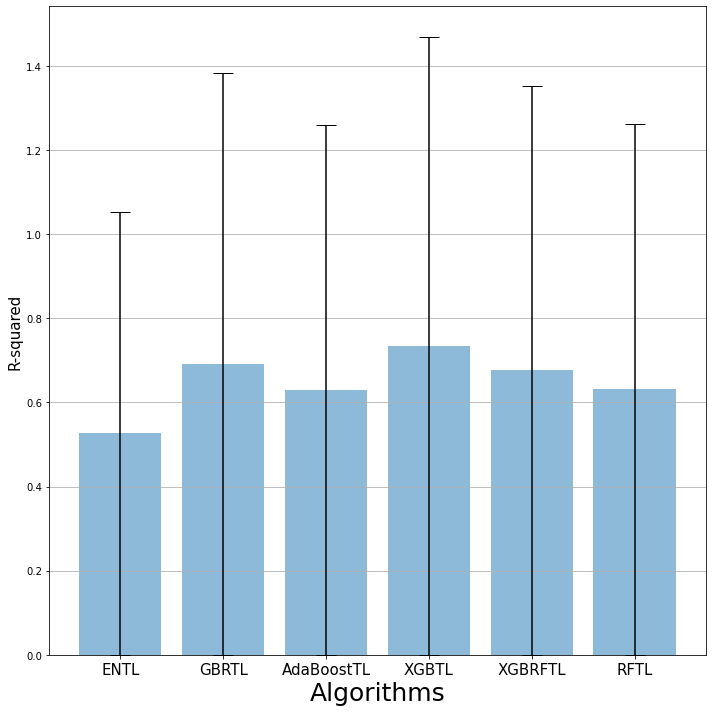

In [109]:
# Build the plot
# plt.figure()

fig, ax = plt.subplots(figsize = (10,10))
ax.bar(x_pos, CTE_r2,
       yerr = error_r2,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('R-squared', fontsize = 15)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 15)
ax.set_xlabel('Algorithms', fontsize = 25)
# ax.set_title('Algorithms')
ax.yaxis.grid(True)

#Save the figure and show
plt.tight_layout()
plt.savefig('plot_r2_USnew.png')
plt.show()